In [87]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import warnings

In [55]:
dataset = pd.read_csv("interview data.csv")

In [56]:
dataset.head()

,TimeStamp,GT1 Generator Watts Max Selected {Avg},GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 Compressor Inlet Temperature {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},GT1 Compressor Discharge Temperature {Avg}
0,8/24/2020 0:00,46.436666,1100.029649,104.321768,56.884733,113.176942,648.852809
1,8/24/2020 0:15,46.343993,1099.984785,104.454431,56.921203,112.983140,648.279097
2,8/24/2020 0:30,46.260622,1100.223210,104.217306,56.957673,112.964069,647.887172
3,8/24/2020 0:45,46.368425,1100.167993,104.080068,56.994142,113.070647,648.049427
4,8/24/2020 1:00,46.290432,1099.842908,103.864473,57.030612,113.042470,647.206482


In [57]:
dataset.info() #No null values in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8260 entries, 0 to 8259
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   TimeStamp                                           8260 non-null   object 
 1   GT1 Generator Watts Max Selected {Avg}              8260 non-null   float64
 2   GT1 Exhaust Temp Median Corrected By Average {Avg}  8260 non-null   float64
 3   GT1 Compressor Inlet Temperature {Avg}              8260 non-null   float64
 4   GT1 IGV angle in deg {Avg}                          8260 non-null   float64
 5   GT1 Compressor Discharge Press Max Select {Avg}     8260 non-null   float64
 6   GT1 Compressor Discharge Temperature {Avg}          8260 non-null   float64
dtypes: float64(6), object(1)
memory usage: 451.8+ KB


In [58]:
list(dataset.columns)

['TimeStamp',
 'GT1 Generator Watts Max Selected {Avg}',
 'GT1 Exhaust Temp Median Corrected By Average {Avg}',
 'GT1 Compressor Inlet Temperature {Avg}',
 'GT1 IGV angle in deg {Avg}',
 'GT1 Compressor Discharge Press Max Select {Avg}',
 'GT1 Compressor Discharge Temperature {Avg}']

Histograms for all parameters


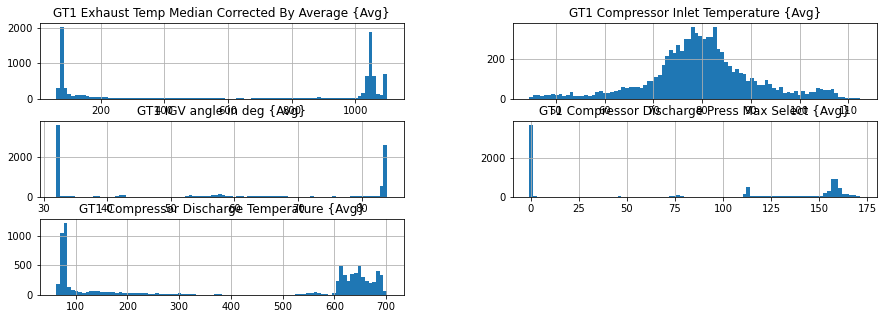

Histogram for Generator Watts:


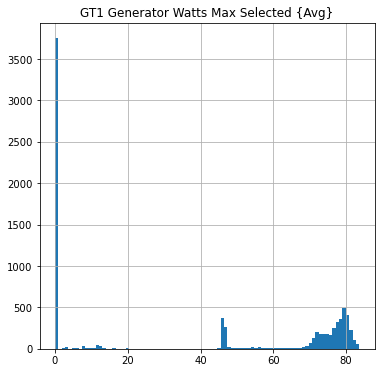

In [59]:
X_name = [ 'GT1 Exhaust Temp Median Corrected By Average {Avg}',
 'GT1 Compressor Inlet Temperature {Avg}',
 'GT1 IGV angle in deg {Avg}',
 'GT1 Compressor Discharge Press Max Select {Avg}',
 'GT1 Compressor Discharge Temperature {Avg}' ]
X = dataset[X_name]
Y_name = ['GT1 Generator Watts Max Selected {Avg}']
Y = dataset[Y_name]
print('Histograms for all parameters')
X.hist(figsize=(15, 5), bins=90)# bins ~= sqrt(N)=90
plt.show() #Graphical Summary

print('Histogram for Generator Watts:')
Y.hist(figsize=(6,6),bins=90)
plt.show() #Graphical Summary

In [90]:
# assessment
from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

# algorithms
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier


In [61]:
test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 13          # setting the seed allows for repeatability
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_pct, random_state=seed)

In [62]:
models = []
models.append(('LIR', LinearRegression())) # default=’lbfgs’
#models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
#models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=5, weights='distance'))) # default is n_neighbors=5, weights='uniform'
#results = []
#names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, Y_train)  # train the model on the training data
    Y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('R^2 Score:', modelName.score(X, Y))
    print('R^2 Score:', modelName.score(X_train, Y_train))
    print('R^2 Score:', modelName.score(X_test, Y_test))

    print('\n')  

RESULTS FOR LIR
R^2 Score: 0.9946343253848933
R^2 Score: 0.9948790001581113
R^2 Score: 0.9936463554137184




plot of GT1 Generator Watts Max Selected {Avg} vsGT1 Exhaust Temp Median Corrected By Average {Avg}


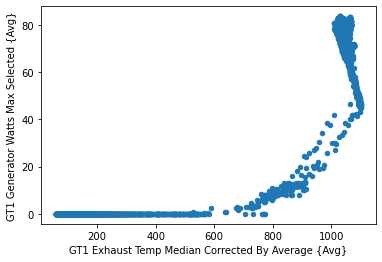

plot of GT1 Generator Watts Max Selected {Avg} vsGT1 Compressor Inlet Temperature {Avg}


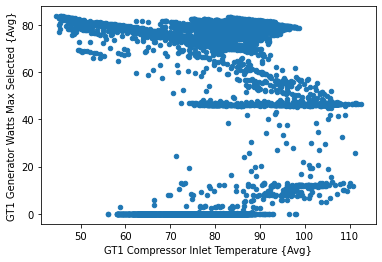

plot of GT1 Generator Watts Max Selected {Avg} vsGT1 IGV angle in deg {Avg}


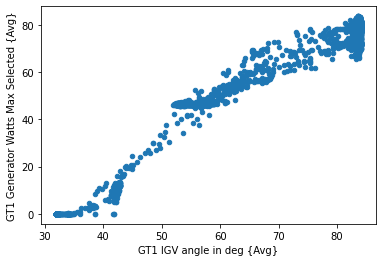

plot of GT1 Generator Watts Max Selected {Avg} vsGT1 Compressor Discharge Press Max Select {Avg}


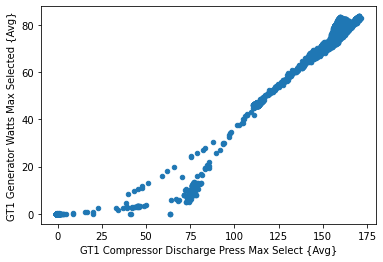

plot of GT1 Generator Watts Max Selected {Avg} vsGT1 Compressor Discharge Temperature {Avg}


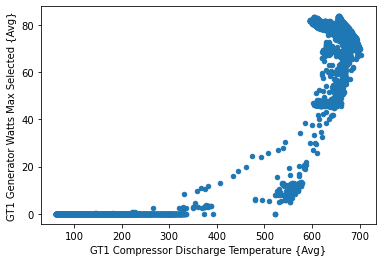

In [79]:
for name in X_name:
    print('plot of','GT1 Generator Watts Max Selected {Avg}','vs'+name)
    dataset.plot(kind='scatter',x=name,y='GT1 Generator Watts Max Selected {Avg}')
    plt.show()

Some of the variables are linear. We will do RandomForest Regression to check the rank of the parameters
 

In [83]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

#knn = neighbors.KNeighborsRegressor()

knn = KNeighborsRegressor(weights='distance')

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_


{'n_neighbors': 3}

In [88]:
#KNN

models = []
#models.append(('LIR', LinearRegression())) # default=’lbfgs’
#models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('KNN-distance1', KNeighborsRegressor(n_neighbors=2, weights='uniform'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-distance2', KNeighborsRegressor(n_neighbors=5, weights='uniform'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-distance3', KNeighborsRegressor(n_neighbors=3, weights='distance'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-distance4', KNeighborsRegressor(n_neighbors=5, weights='distance'))) # default is n_neighbors=5, weights='uniform'

#results = []
#names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, Y_train)  # train the model on the training data
    Y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    mse = mean_squared_error(Y_test, Y_predicted)
    rmse = math.sqrt(mse)
    print('RESULTS FOR '+name)  
    print('Root Mean Square Error:',rmse)

    print('\n')  

RESULTS FOR KNN-distance1
Root Mean Square Error: 0.4211380222091857


RESULTS FOR KNN-distance2
Root Mean Square Error: 0.5394663893666495


RESULTS FOR KNN-distance3
Root Mean Square Error: 0.43389557295391945


RESULTS FOR KNN-distance4
Root Mean Square Error: 0.4841596200917779




In [99]:
params = {'n_estimators':[50,75,100,125,150]}

#knn = neighbors.KNeighborsRegressor()

rnd = RandomForestRegressor(random_state=137)

model = GridSearchCV(rnd, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_


C:\Users\aryaf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aryaf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aryaf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\aryaf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

{'n_estimators': 50}

In [101]:
#RandomForest

models = []
#models.append(('LIR', LinearRegression())) # default=’lbfgs’
#models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('Randforrest1', RandomForestRegressor(n_estimators=100, max_depth=None,random_state=420))) # n_estimators=100, *, max_depth=None,random_state=None
models.append(('Randforrest2', RandomForestRegressor(n_estimators=50, max_depth=None,random_state=420))) # n_estimators=100, *, max_depth=None,random_state=None

#models.append(('KNN-distance2', KNeighborsRegressor(n_neighbors=5, weights='uniform'))) # default is n_neighbors=5, weights='uniform'
#models.append(('KNN-distance3', KNeighborsRegressor(n_neighbors=3, weights='distance'))) # default is n_neighbors=5, weights='uniform'
#models.append(('KNN-distance4', KNeighborsRegressor(n_neighbors=5, weights='distance'))) # default is n_neighbors=5, weights='uniform'

#results = []
#names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, Y_train)  # train the model on the training data
    Y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    mse = mean_squared_error(Y_test, Y_predicted)
    rmse = math.sqrt(mse)
    print('RESULTS FOR '+name)  
    print('Root Mean Square Error:',rmse)

    print('\n')  

<ipython-input-101-f83f697eea6a>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelName.fit(X_train, Y_train)  # train the model on the training data


RESULTS FOR Randforrest1
Root Mean Square Error: 0.27842317919663123




<ipython-input-101-f83f697eea6a>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelName.fit(X_train, Y_train)  # train the model on the training data


RESULTS FOR Randforrest2
Root Mean Square Error: 0.2769914687811714


